In [66]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input
from tensorflow.keras.models import Model
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt

In [3]:
train_ds, val_ds = image_dataset_from_directory(
    '../Data/proccessed',
    batch_size=32,
    image_size=(224,224),
    subset='both',
    seed=18,
    validation_split=0.2,
)

Found 2671 files belonging to 4 classes.
Using 2137 files for training.
Using 534 files for validation.


E0000 00:00:1765861970.007913    6468 cuda_executor.cc:1309] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1765861970.018390    6468 gpu_device.cc:2342] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [4]:
base = MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=(224,224,3)
)

base.trainable = False

In [5]:
inputs = Input(shape=(224,224,3))

x = preprocess_input(inputs)

In [6]:
x = base(x)

In [7]:
x = GlobalAveragePooling2D()(x)

In [8]:
x = Dense(128, activation='relu')(x)

In [9]:
outputs = Dense(4, activation='softmax')(x)

In [10]:
model = Model(inputs=inputs, outputs = outputs)

In [11]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [12]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3, 
    restore_best_weights=True
)

In [13]:
checkpoint = ModelCheckpoint('model_ckeckpoint.weights.h5',
                             monitor='val_accuracy',
                             save_weights_only=True
)

In [14]:
model.fit(train_ds,
          validation_data=val_ds,
          epochs=10, 
          callbacks=[early_stop,checkpoint]
)

Epoch 1/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 30s 400ms/step - accuracy: 0.7057 - loss: 0.6729 - val_accuracy: 0.8371 - val_loss: 0.4175
Epoch 2/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 26s 392ms/step - accuracy: 0.8666 - loss: 0.3357 - val_accuracy: 0.8408 - val_loss: 0.3805
Epoch 3/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 25s 379ms/step - accuracy: 0.9134 - loss: 0.2368 - val_accuracy: 0.8521 - val_loss: 0.3767
Epoch 4/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 26s 384ms/step - accuracy: 0.9158 - loss: 0.2089 - val_accuracy: 0.8614 - val_loss: 0.3430
Epoch 5/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 26s 381ms/step - accuracy: 0.9574 - loss: 0.1394 - val_accuracy: 0.8745 - val_loss: 0.3447
Epoch 6/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 26s 393ms/step - accuracy: 0.9644 - loss: 0.1198 - val_accuracy: 0.8670 - val_loss: 0.3516
Epoch 7/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 26s 388ms/step - accuracy: 0.9794 - loss: 0.0823 - val_accuracy: 0.8820 - val_loss: 0.3297
Epoch 8/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 26s 382ms/step - accuracy: 0.9864 - loss: 0.0650 - val_accu

In [15]:
y_pred = model.predict(val_ds)

17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 359ms/step


In [16]:
y_pred[0]

array([9.6994526e-08, 3.6906811e-05, 5.6823236e-01, 4.3173066e-01],
      dtype=float32)

In [98]:
i = 10
for imgs, labels in val_ds.take(2):
    img = imgs[i]
    label = labels[i]

In [99]:
img_ = Image.fromarray(img_np)

In [103]:
img_np = img.numpy().astype(np.uint8)

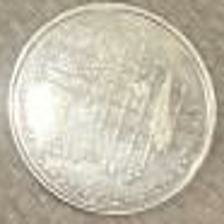

In [104]:
img_

In [106]:
print(label)

tf.Tensor(2, shape=(), dtype=int32)


In [107]:
y_pred[0]

array([9.6994526e-08, 3.6906811e-05, 5.6823236e-01, 4.3173066e-01],
      dtype=float32)

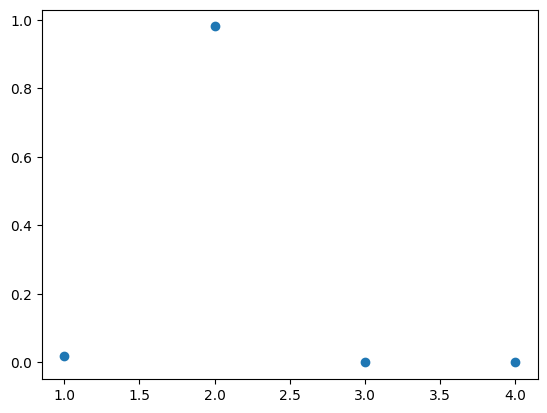

In [110]:
plt.scatter([ j + 1 for j in range(4)], y_pred[i])